# Regression Analysis For Automobile Miles Per Gallon Dataset

The auto-mpg dataset is a dataset which gives mileage of a vehicle in mpg(miles per gallon) based on several parameters.   

### Columns are:  
#### Input Features 
**cylinders**: number of cylinders in vehicle     
**displacement**: continuous variable  
**horsepower**: power of vehicle     
**weight**: weight of vehicle   
**acceleration**: acceleration of vehicle    
**model year**: year of vehicle model   
**origin**: origin of model  1 = Arizona 2 = Ohio  3 = Washington 

#### Output Feature
**mpg**: Miles per gallon

## Task:
Perform Linear Regression to predict the miles per gallon based on **relevant features**.

### Importing CSV and checking for missing values

In [11]:
import pandas as pd
df = pd.read_csv('auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


#### Here we see that the horsepower column has object (string) values in it

In [13]:
df = df.dropna()
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


#### After performing dropna on the DataFrame we obtain the same number of entries. Hence, there are no missing values in the data. However there are some values in horsepower column that have "?" value in them. Assuming all such values are 0.

### Converting "?" values in Horsepower column to 0

In [14]:
i=0
for everyval in df["horsepower"]:
    if everyval == "?":
        df["horsepower"].loc[i] = "0"
    i = i+1
df["HP"] = df["horsepower"]
i=0 
for everyval in df["horsepower"]:
    everyval = int(everyval)
    df["HP"].loc[i] = everyval
    i=i+1
df["HP"] = pd.to_numeric(df["HP"])

c:\users\nihaa\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


### Min, Max and Std of weight for all the models in the 80s

In [15]:
years = range(80,90)
content = df[df["model year"].apply(lambda x: x in years)]
print("Maximum weight = {0:f}".format(content["weight"].max()))
print("Minimum Weight = {0:f}".format(content["weight"].min()))
print("Standard Deviation = {0:f}".format(content["weight"].std()))

Maximum weight = 3725.000000
Minimum Weight = 1755.000000
Standard Deviation = 440.696791


### Plotting Average Horsepower & Average MPG for each year

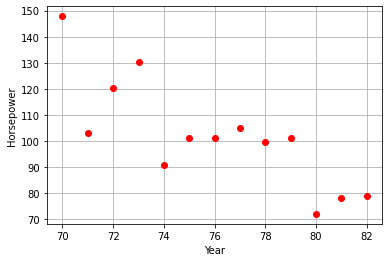

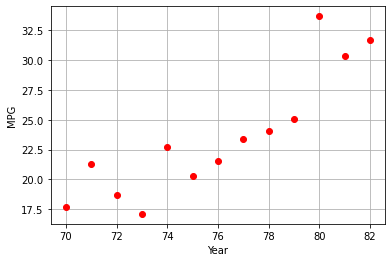

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

content = df.groupby(["model year"]).mean()
plt.plot(content.index,content["HP"],"ro")
plt.xlabel("Year")
plt.ylabel("Horsepower")
plt.grid()
plt.show()
plt.plot(content.index,content["mpg"],"ro")
plt.xlabel("Year")
plt.ylabel("MPG")
plt.grid()
plt.show()
    

#### Average horsepower decreases over the years while average MPG increases over the years

In [18]:
high = content[content["mpg"] == content["mpg"].max()]
high

,mpg,cylinders,displacement,weight,acceleration,origin,HP
model year,,,,,,,
80,33.696552,4.137931,115.827586,2436.655172,16.934483,2.206897,72.137931


#### A person looking to buy a car with a higher mileage should consider buying a car with 4 cylinders

### Finding Average MPG rating for every Origin State

In [19]:
content = df.groupby("origin").mean()
print("Avg mpg for Arizona   : {0:f}".format(content["mpg"].loc[1]))
print("Avg mpg for Ohio      : {0:f}".format(content["mpg"].loc[2]))
print("Avg mpg for Washington: {0:f}".format(content["mpg"].loc[3]))

Avg mpg for Arizona   : 20.083534
Avg mpg for Ohio      : 27.891429
Avg mpg for Washington: 30.450633


In [20]:
df.corr()["mpg"]

mpg             1.000000
cylinders      -0.775396
displacement   -0.804203
weight         -0.831741
acceleration    0.420289
model year      0.579267
origin          0.563450
HP             -0.754276
Name: mpg, dtype: float64

#### From the above values we observe that cylinders, displacement, weight and HP highly affect the mpg value of a car

###  Designing MPG value predictor model

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

cols_to_consider = ["cylinders","displacement","weight","HP"]
X = df[cols_to_consider]
Y = df["mpg"]
X_train, X_test, Y_train , Y_test = train_test_split(X,Y,test_size=0.2, random_state = 30)

model = LinearRegression()
model.fit(X_train,Y_train)


LinearRegression()

In [22]:
model.score(X_train,Y_train)

0.7173001967308406

#### Predicting MPG for 6 cylinders, 300 displacement, 4000kg weight and 130 horsepower

In [24]:
ne = {"cylinders":[6],"displacement":[300],"weight":[4000],"HP":[130]}
new = pd.DataFrame(data=ne)

model.predict(new)

array([17.02753983])

### Designing custom MPG value predictor model for Washington State

In [25]:
cols_to_consider = ["cylinders","displacement","weight","HP"]
X = df[df["origin"] == 3]
X = X[cols_to_consider]
Y = df[df["origin"] == 3]
Y = Y["mpg"]
X_train, X_test, Y_train , Y_test = train_test_split(X,Y,test_size=0.2,random_state = 30)
model = LinearRegression()
model.fit(X_train,Y_train)

ne = {"cylinders":[6],"displacement":[300],"weight":[4000],"HP":[130]}
new = pd.DataFrame(data=ne)

model.predict(new)

array([27.67519241])